In [34]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

folder_path = r"D:\USTH\Year_3\Internship\DeffendThesis\Data"
file_name = "Data_UF_cleaned.xlsx"


df = pd.read_excel(f"{folder_path}\\{file_name}")
# Create a working copy
df_seg = df.copy()

# Step 1: Convert date columns to datetime
df_seg['Ngày SD từ'] = pd.to_datetime(df_seg['Ngày SD từ'], errors='coerce')
df_seg['Ngày SD đến'] = pd.to_datetime(df_seg['Ngày SD đến'], errors='coerce')

# Step 2: Calculate Usage Duration in days
df_seg['Usage_Duration'] = (df_seg['Ngày SD đến'] - df_seg['Ngày SD từ']).dt.days

# Step 3: Select relevant columns
df_seg = df_seg[['Doanh thu', 'Gói internet', 'Usage_Duration']]

# Step 4: Drop rows with missing values
df_seg = df_seg.dropna()

# Step 5: Encode 'Gói internet' (Package Type)
le = LabelEncoder()
df_seg['Gói internet'] = le.fit_transform(df_seg['Gói internet'])

# Show cleaned and ready-to-cluster data
df_seg.head()  # Hiển thị 5 dòng đầu tiên của DataFrame



,Doanh thu,Gói internet,Usage_Duration
0,39900.0,13,1.0
1,39900.0,13,1.0
2,39900.0,13,1.0
3,39900.0,18,1.0
6,39900.0,13,1.0


In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
# ------------------------------------------
# STEP 1: Standardize the data
# Why? Because K-Means uses distance. We want all features (e.g., Revenue, Usage) to have the same weight.
# ------------------------------------------
scaler = StandardScaler()
df_seg[['Doanh thu', 'Gói internet', 'Usage_Duration']]= scaler.fit_transform(df_seg[['Doanh thu', 'Gói internet', 'Usage_Duration']])


df_seg

,Doanh thu,Gói internet,Usage_Duration
0,-0.302277,0.139113,-0.597994
1,-0.302277,0.139113,-0.597994
2,-0.302277,0.139113,-0.597994
3,-0.302277,1.067487,-0.597994
6,-0.302277,0.139113,-0.597994
...,...,...,...
23617,-0.302277,0.139113,-0.343806
23618,-0.302277,1.067487,-0.343806
23619,1.779257,1.067487,0.927137
23620,4.693405,1.067487,2.748821


In [37]:
def optimise_kmeans(data,max_k):
    means = []
    inertias = []
    
    for k in range (1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Inertial')
    plt.show()

In [60]:
print(df_seg[['Gói internet', 'Doanh thu']].info())
print(df_seg[['Gói internet', 'Doanh thu']].head())


<class 'pandas.core.frame.DataFrame'>
Index: 15560 entries, 0 to 23622
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gói internet  15560 non-null  float64
 1   Doanh thu     15560 non-null  float64
dtypes: float64(2)
memory usage: 364.7 KB
None
   Gói internet  Doanh thu
0      0.139113  -0.302277
1      0.139113  -0.302277
2      0.139113  -0.302277
3      1.067487  -0.302277
6      0.139113  -0.302277


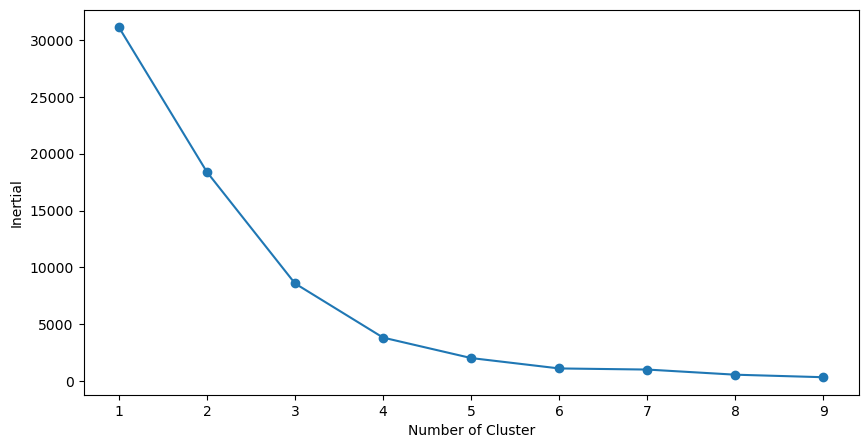

In [61]:
optimise_kmeans(df_seg[['Gói internet', 'Doanh thu']],10)

In [62]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_seg[['Gói internet', 'Doanh thu']])

KMeans(n_clusters=3)
df_seg['kmean_3'] = kmeans.labels_
df_seg

,Doanh thu,Gói internet,Usage_Duration,kmean_3
0,-0.302277,0.139113,-0.597994,0
1,-0.302277,0.139113,-0.597994,0
2,-0.302277,0.139113,-0.597994,0
3,-0.302277,1.067487,-0.597994,0
6,-0.302277,0.139113,-0.597994,0
...,...,...,...,...
23617,-0.302277,0.139113,-0.343806,0
23618,-0.302277,1.067487,-0.343806,0
23619,1.779257,1.067487,0.927137,0
23620,4.693405,1.067487,2.748821,2


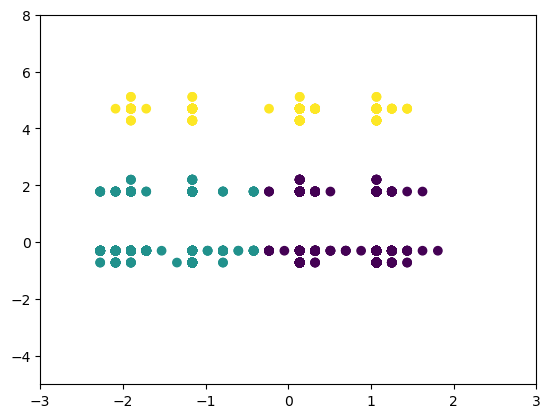

In [63]:
plt.scatter(x = df_seg['Gói internet'],y = df_seg['Doanh thu'], c =df_seg['kmean_3'] )
plt.xlim(-3,3)
plt.ylim(-5,8)
plt.show()